In [2]:
print("hi");

hi


In [1]:
# Customer Segmentation using K-Means Clustering

# Step 1: Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set(style='whitegrid')

customer_data = pd.read_csv('Mall_Customers.csv')

In [2]:
# Step 2: First 5 rows in the dataframe 
print(customer_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Step 3: Finding the number of rows and columns (as seen in your image)
print(customer_data.shape)

(200, 5)


In [4]:
# Step 4: Getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Step 5: Checking for missing values (as seen in your image)
print(customer_data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
X = customer_data.iloc[:, [3, 4]].values
print(X[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


In [7]:
## Step 6 & 7: Finding WCSS and Plotting the Elbow Graph
# -----------------------------------------------------------------------------

# Finding wcss value for different number of clusters
wcss = []
# Test for k=1 up to k=10 clusters
for i in range(1, 11):
    # 'k-means++' ensures smart initialization of centroids to speed up convergence
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # 'inertia_' is the WCSS value

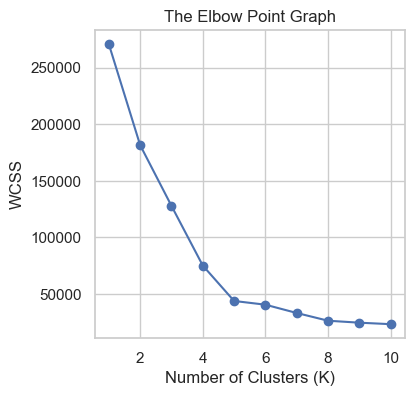

In [12]:
# Plot an elbow graph
plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Step 8: Optimum Number of Clusters = 5 (Determined from the elbow point in the graph)

#Training the k-Means Clustering Model with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init='auto')

# Step 10: Return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

# Get the coordinates of the final centroids
centroids = kmeans.cluster_centers_


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1]


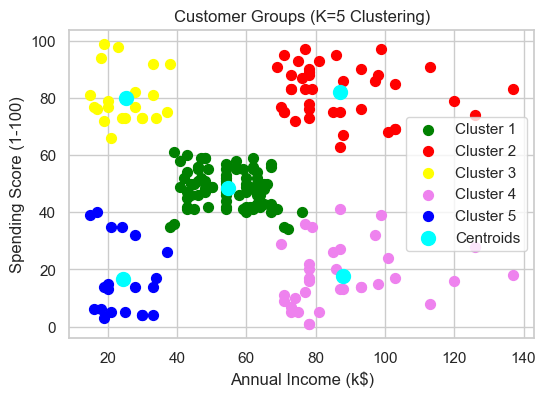

In [10]:
#5 clusters - 0,1,2,3,4
#Visualizing all the clusters
#plotting all the clusters and their Centroids

plt.figure(figsize=(6, 4))
plt.title('Customer Groups (K=5 Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Cluster 5')

#plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='cyan', label='Centroids', marker='o')

plt.legend()
plt.show()